## Scaler dataframe for Auger Open Data 
### Análisis de potencias

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import astropy
from astropy.time import Time
from astropy.coordinates import EarthLocation, AltAz, get_body
import astropy.units as u

In [5]:
from augerscalerpy.scaler_cleaning import scaler_clean, plot_data

In [6]:
scaler3600s = scaler_clean('scaler_ALL_hourly_11abril.csv','scaler_3600s')
scaler3600s

Hay  (11805, 4) líneas vacías


,Date,ScalerCorr,pressure,activeSD
1364,2006-01-01 00:29:46,1603.57,858.762,544.333
1365,2006-01-01 00:59:46,1603.88,859.376,549.250
1366,2006-01-01 01:29:46,1604.98,859.990,554.083
1367,2006-01-01 01:59:46,1606.05,860.604,558.083
1368,2006-01-01 02:29:46,1607.02,861.121,561.833
...,...,...,...,...
253138,2020-12-31 20:59:46,1656.40,858.720,424.167
253139,2020-12-31 21:29:46,1654.27,858.809,422.500
253140,2020-12-31 21:59:46,1654.61,858.950,421.833
253141,2020-12-31 22:29:46,1655.48,859.195,423.333


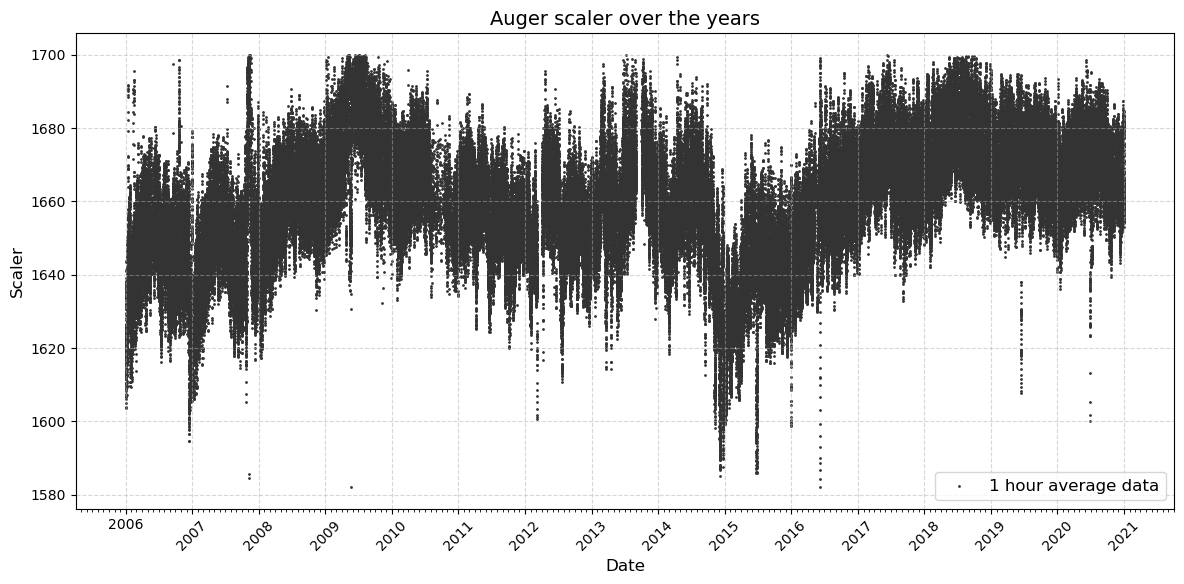

In [22]:
plot_data(scaler3600s,'scaler3600_new')

#### ESPECTRO DE POTENCIAS

In [7]:
##### FAST FOURIER TRANSFORM
data = scaler3600s['ScalerCorr']
fft_result = np.fft.fft(data)

In [54]:
power_spectrum = np.abs(fft_result)**2

In [55]:
from augerscalerpy.plot_config import configure_plots

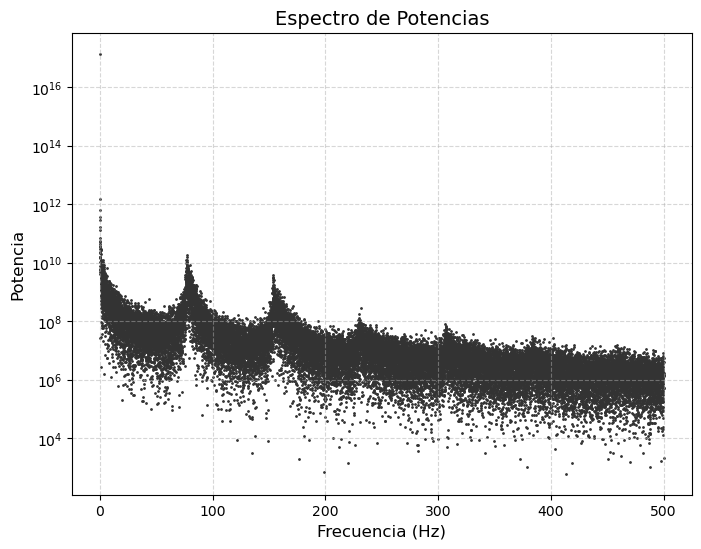

In [56]:
# Crear un vector de frecuencias correspondientes a los datos
# Esto asume que tus datos se recopilaron a intervalos regulares
# Si no es así, debes ajustar el cálculo de frecuencia
sampling_rate = 3600  # Unidad de tiempo entre mediciones
n = len(data)  # Número de puntos de datos
frequencies = np.fft.fftfreq(n, d=1/sampling_rate)

# Crear la gráfica del espectro de potencias
configure_plots()


# Límite superior para la frecuencia (500 Hz)
max_frequency = 500  # Hz
# Encuentra el índice más cercano en el arreglo de frecuencias
max_frequency_index = np.argmax(frequencies >= max_frequency)


#plt.scatter(frequencies[:n//2], power_spectrum[:n//2],s=1)  # Solo graficamos la mitad positiva del espectro
plt.scatter(frequencies[:max_frequency_index], power_spectrum[:max_frequency_index], s=1)

plt.yscale('log')  # Configurar el eje horizontal en escala logarítmica
#plt.xscale('log')  # Configurar el eje horizontal en escala logarítmica


# Etiquetar el eje x con unidades de tiempo
# Calculamos las frecuencias correspondientes a días, meses y años
#frequencies_in_seconds = 1 / frequencies[:n//2]  # Invertimos las frecuencias a segundos
#seconds_in_a_day = 24 * 3600  # Segundos en un día
#seconds_in_a_month = 30 * 24 * 3600  # Aproximadamente, segundos en un mes
#seconds_in_a_year = 365 * 24 * 3600  # Aproximadamente, segundos en un año
#seconds_in_11_years = 11 * 365 * 24 * 3600  # Aproximadamente, segundos en 11 años

# Marcas en el eje x
#x_ticks = [1, 1 / seconds_in_a_day, 1 / seconds_in_a_month, 1 / seconds_in_a_year, 1 / seconds_in_11_years]
#x_tick_labels = ['1 Hz', '1/day', '1/month', '1/year', '1/11 years']

# Ajustar las etiquetas para el rango de frecuencia máximo de 500 Hz
#x_ticks = [1 / max_frequency] + x_ticks
#x_tick_labels = [f'{max_frequency} Hz'] + x_tick_labels



#plt.xticks(x_ticks, x_tick_labels)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia')
plt.title('Espectro de Potencias')
plt.grid()
plt.show()

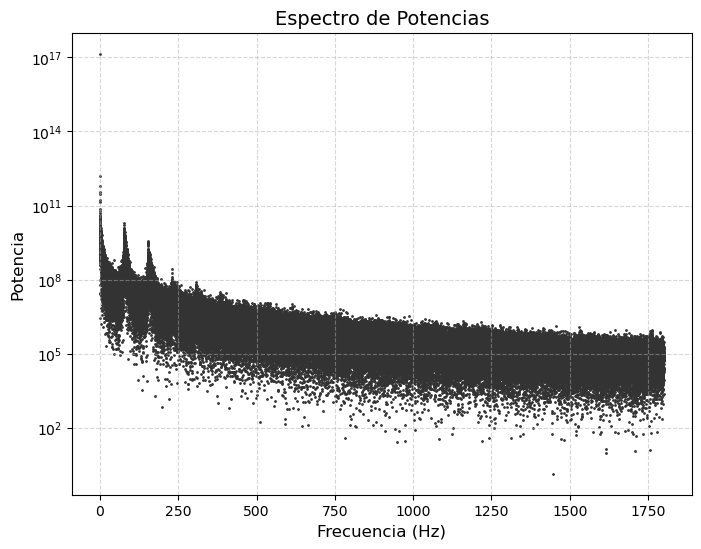

In [57]:
# Crear un vector de frecuencias correspondientes a los datos
# Esto asume que tus datos se recopilaron a intervalos regulares
# Si no es así, debes ajustar el cálculo de frecuencia
sampling_rate = 3600  # Unidad de tiempo entre mediciones
n = len(data)  # Número de puntos de datos
frequencies = np.fft.fftfreq(n, d=1/sampling_rate)

# Crear la gráfica del espectro de potencias
configure_plots()


# Límite superior para la frecuencia (500 Hz)
#max_frequency = 500  # Hz
# Encuentra el índice más cercano en el arreglo de frecuencias
#max_frequency_index = np.argmax(frequencies >= max_frequency)


plt.scatter(frequencies[:n//2], power_spectrum[:n//2],s=1)  # Solo graficamos la mitad positiva del espectro
#plt.scatter(frequencies[:max_frequency_index], power_spectrum[:max_frequency_index], s=1)

plt.yscale('log')  # Configurar el eje horizontal en escala logarítmica
#plt.xscale('log')  # Configurar el eje horizontal en escala logarítmica


# Etiquetar el eje x con unidades de tiempo
# Calculamos las frecuencias correspondientes a días, meses y años
#frequencies_in_seconds = 1 / frequencies[:n//2]  # Invertimos las frecuencias a segundos
#seconds_in_a_day = 24 * 3600  # Segundos en un día
#seconds_in_a_month = 30 * 24 * 3600  # Aproximadamente, segundos en un mes
#seconds_in_a_year = 365 * 24 * 3600  # Aproximadamente, segundos en un año
#seconds_in_11_years = 11 * 365 * 24 * 3600  # Aproximadamente, segundos en 11 años

# Marcas en el eje x
#x_ticks = [1, 1 / seconds_in_a_day, 1 / seconds_in_a_month, 1 / seconds_in_a_year, 1 / seconds_in_11_years]
#x_tick_labels = ['1 Hz', '1/day', '1/month', '1/year', '1/11 years']

# Ajustar las etiquetas para el rango de frecuencia máximo de 500 Hz
#x_ticks = [1 / max_frequency] + x_ticks
#x_tick_labels = [f'{max_frequency} Hz'] + x_tick_labels



#plt.xticks(x_ticks, x_tick_labels)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia')
plt.title('Espectro de Potencias')
plt.grid()
plt.show()

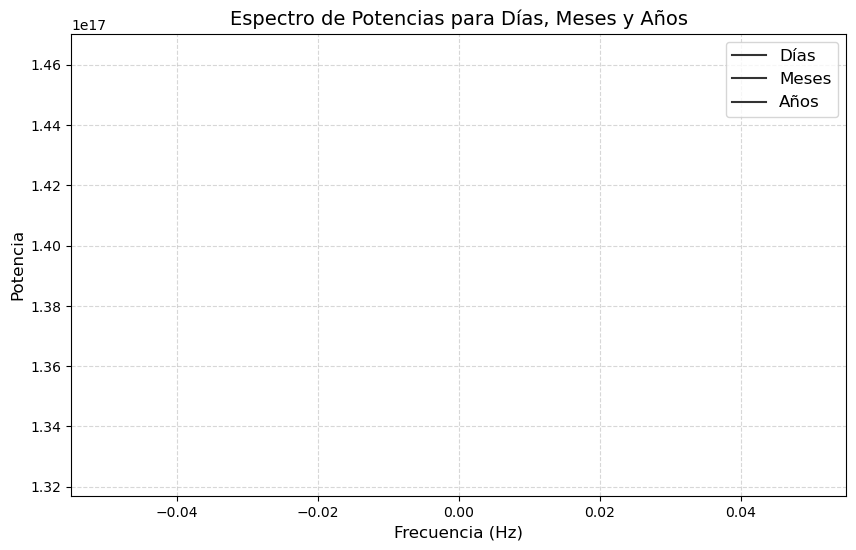

In [60]:
import numpy as np
import matplotlib.pyplot as plt


# Aplicar la transformada rápida de Fourier (FFT)
fft_result = np.fft.fft(data)

# Calcular el espectro de potencias
power_spectrum = np.abs(fft_result)**2

# Crear un vector de frecuencias correspondientes a los datos
# La frecuencia de muestreo es una medición por hora (3600 segundos)
# Calculamos la frecuencia en Hertz
sampling_interval = 3600  # Unidad de tiempo en segundos entre mediciones
n = len(data)  # Número de puntos de datos
frequencies = np.fft.fftfreq(n, d=1/sampling_interval)



# Encontrar las frecuencias correspondientes a escalas de tiempo de días, meses y años
seconds_in_a_day = 24 * 3600  # Segundos en un día
seconds_in_a_month = 30 * 24 * 3600  # Aproximadamente, segundos en un mes
seconds_in_a_year = 365 * 24 * 3600  # Aproximadamente, segundos en un año

# Calcular las frecuencias correspondientes a esas escalas de tiempo
frequencies_days = 1 / seconds_in_a_day
frequencies_months = 1 / seconds_in_a_month
frequencies_years = 1 / seconds_in_a_year

# Encontrar los índices correspondientes en el arreglo de frecuencias
index_days = np.argmax(frequencies >= frequencies_days)
index_months = np.argmax(frequencies >= frequencies_months)
index_years = np.argmax(frequencies >= frequencies_years)

# Crear la gráfica del espectro de potencias para escalas de tiempo de días, meses y años
plt.figure(figsize=(10, 6))
plt.plot(frequencies[:index_days], power_spectrum[:index_days], label='Días')
plt.plot(frequencies[:index_months], power_spectrum[:index_months], label='Meses')
plt.plot(frequencies[:index_years], power_spectrum[:index_years], label='Años')
#plt.xscale('log')  # Configurar el eje horizontal en escala logarítmica
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia')
plt.title('Espectro de Potencias para Días, Meses y Años')
plt.legend()
plt.grid()
plt.show()



### No hay nada intentaré usar wavelets como en (C. Idosa 2023)

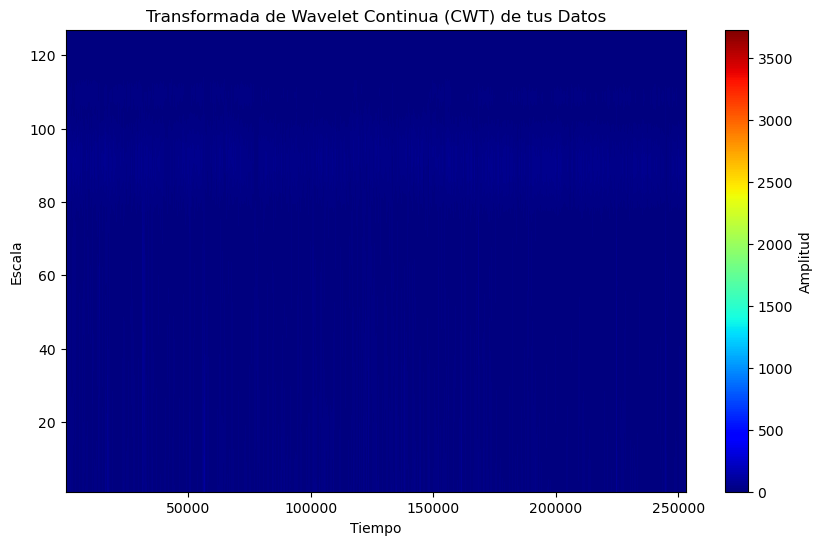

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
import pandas as pd

# Suponiendo que 'scaler3600' es tu DataFrame y 'ScalerCorr' es la columna de interés
# Suponemos que ya tienes los datos en un DataFrame llamado 'scaler3600'
data = scaler3600s['ScalerCorr'].values  # Convertir la columna en un arreglo de numpy

# Generar una señal a partir de tus datos
# Aquí estamos suponiendo que el tiempo es simplemente el índice del DataFrame
# Si tienes una columna específica para el tiempo, reemplaza 'scaler3600.index' con esa columna
time = scaler3600s.index.values

# Realizar una Transformada de Wavelet Continua (CWT)
wavelet = 'morl'  # Tipo de wavelet (puedes elegir otro)
scales = np.arange(1, 128)  # Escalas a evaluar
coef, freqs = pywt.cwt(data, scales, wavelet)

# Crear una gráfica de la CWT
plt.figure(figsize=(10, 6))
plt.imshow(np.abs(coef), extent=[min(time), max(time), min(scales), max(scales)], cmap='jet', aspect='auto')
plt.colorbar(label='Amplitud')
plt.title('Transformada de Wavelet Continua (CWT) de tus Datos')
plt.xlabel('Tiempo')
plt.ylabel('Escala')
plt.show()


In [11]:
import numpy as np
import pywt
import pandas as pd

# Suponiendo que 'scaler3600' es tu DataFrame y 'ScalerCorr' es la columna de interés
# Suponemos que ya tienes los datos en un DataFrame llamado 'scaler3600'
data = scaler3600s['ScalerCorr'].values  # Convertir la columna en un arreglo de numpy

# Realizar una Transformada de Wavelet Discreta (DWT)
wavelet = 'haar'  # Tipo de wavelet (puedes elegir otro)
level = 5  # Nivel de descomposición de la DWT

# Aplicar la DWT
coeffs = pywt.wavedec(data, wavelet, level=level)

# Coeficientes de aproximación (cA) y detalle (cD) para cada nivel de descomposición
cA = coeffs[0]  # Coeficiente de aproximación en el último nivel
cD = coeffs[1:]  # Coeficientes de detalle en cada nivel

# Puedes usar cA y cD para análisis adicionales o reconstruir la señal original si es necesario


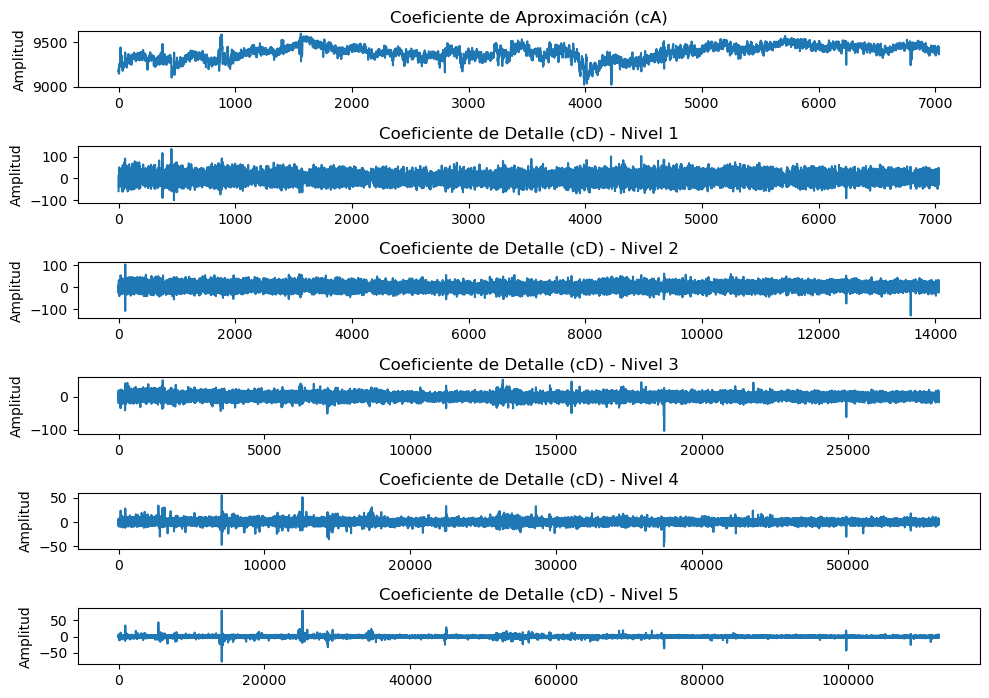

In [13]:
import matplotlib.pyplot as plt

# Crear una figura más grande para mejorar la visualización
plt.figure(figsize=(10, 8))

# Visualizar los coeficientes de aproximación y detalle
# Coeficiente de aproximación en el último nivel
plt.subplot(level+2, 1, 1)
plt.plot(cA)
plt.title('Coeficiente de Aproximación (cA)')
plt.ylabel('Amplitud')

# Coeficientes de detalle en cada nivel
for i, cd in enumerate(cD):
    plt.subplot(level+2, 1, i+2)
    plt.plot(cd)
    plt.title(f'Coeficiente de Detalle (cD) - Nivel {i+1}')
    plt.ylabel('Amplitud')

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar la gráfica
plt.show()



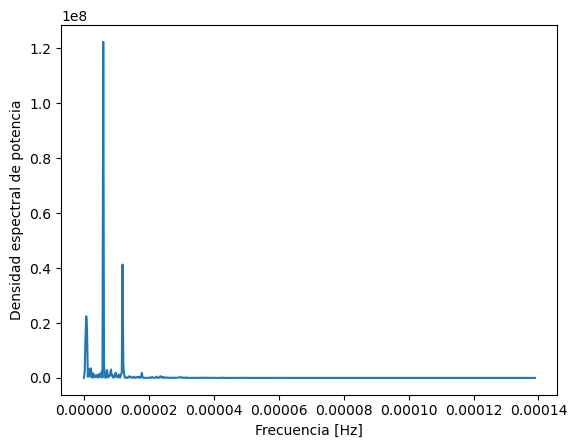

In [3]:
## ESPECTRO DE POTENCIAS DE LOS DATOS

from scipy.signal import periodogram

# Cargamos los datos del dataframe scaler3600s

# Seleccionamos los datos correspondientes al mes de junio de 2016
mes = scaler3600s[(scaler3600s['Date'] >= "2017-06-01") & (scaler3600s['Date'] < "2017-07-01")]


# Eliminamos los valores nulos de la columna ScalerCorr
data = mes.dropna(subset=['ScalerCorr'])

# Obtenemos la frecuencia y la densidad espectral de potencia de los datos
f, psd = periodogram(data['ScalerCorr'], fs=1/3600)

# Graficamos el espectro de potencias
plt.plot(f, psd)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad espectral de potencia')
plt.show()

/tmp/ipykernel_22161/2980186425.py:4: RuntimeWarning: divide by zero encountered in true_divide
  periods = 1/frequencies/3600/24


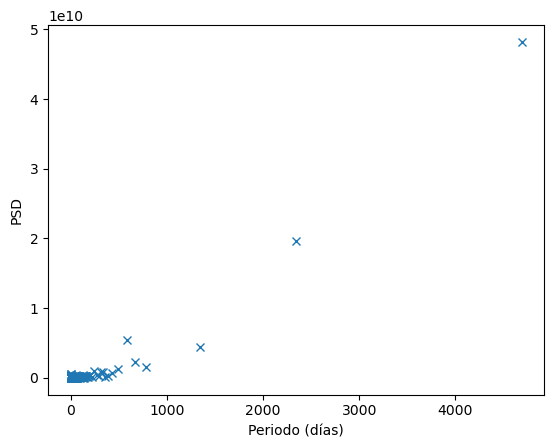

In [4]:
from scipy.signal import periodogram, find_peaks
frequencies, power_spectrum = periodogram(scaler3600s['ScalerCorr'], fs=1/3600)
peaks, _ = find_peaks(power_spectrum, height=2000)
periods = 1/frequencies/3600/24
plt.plot(periods[peaks], power_spectrum[peaks], 'x')
plt.xlabel('Periodo (días)')
plt.ylabel('PSD')
plt.show()

/tmp/ipykernel_22161/3663782014.py:18: RuntimeWarning: divide by zero encountered in true_divide
  period = 1/f/86400


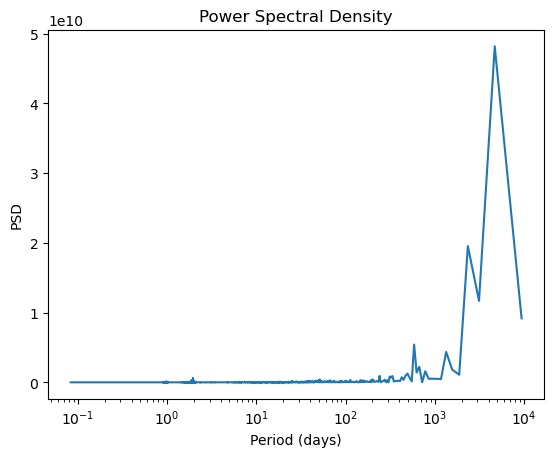

In [5]:
from scipy.signal import periodogram
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch
from scipy import stats

# Seleccionar el período de tiempo acotado por los valores en la columna "Date"
start_date = "2006-01-01"
end_date = "2020-12-30"
mask = (scaler3600s['Date'] >= start_date) & (scaler3600s['Date'] <= end_date)
data = scaler3600s[mask]['ScalerCorr']

# Calcular el periodograma
fs = 1/3600 # Frecuencia de muestreo en Hz
f, psd = periodogram(data, fs=fs)

# Convertir la frecuencia a periodo en días
period = 1/f/86400




# Graficar el espectro de potencias
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.semilogx(period, psd)
#ax.set_xlim(periods.max(), periods.min()) # invertir el eje x



ax.set_xlabel('Period (days)')
ax.set_ylabel('PSD')
ax.set_title('Power Spectral Density')
#plt.yscale('log')
plt.show()